In [67]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [68]:
data=pd.read_csv('avocado.csv')

In [69]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [71]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [72]:
data.shape

(18249, 14)

In [73]:
data=data.sort_values(by='Date',ascending='True')

In [74]:
data.loc[data['region']=='Houston'].head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
10113,51,2015-01-04,1.22,8938.32,7009.77,671.88,0.00,1256.67,1256.67,0.00,0.0,organic,2015,Houston
987,51,2015-01-04,0.71,1062990.62,506426.58,436347.57,4378.92,115837.55,90299.85,25537.70,0.0,conventional,2015,Houston
986,50,2015-01-11,0.78,1062071.65,463272.52,441785.80,4094.47,152918.86,126995.76,25923.10,0.0,conventional,2015,Houston
10112,50,2015-01-11,1.26,7561.00,6142.35,818.65,0.00,600.00,600.00,0.00,0.0,organic,2015,Houston
985,49,2015-01-18,0.77,1017854.16,458532.19,429687.47,9353.74,120280.76,107320.39,12960.37,0.0,conventional,2015,Houston


In [75]:
data=data[['Date','AveragePrice','Total Volume','year','region','type']]

In [76]:
data['region'].value_counts()

SouthCentral           338
BuffaloRochester       338
Louisville             338
Albany                 338
SouthCarolina          338
SanFrancisco           338
PhoenixTucson          338
Indianapolis           338
Orlando                338
Pittsburgh             338
Tampa                  338
Jacksonville           338
RaleighGreensboro      338
TotalUS                338
NorthernNewEngland     338
NewYork                338
Syracuse               338
Boise                  338
Detroit                338
DallasFtWorth          338
HartfordSpringfield    338
Seattle                338
GrandRapids            338
MiamiFtLauderdale      338
California             338
Nashville              338
Denver                 338
LasVegas               338
Midsouth               338
Philadelphia           338
Houston                338
West                   338
Charlotte              338
StLouis                338
Chicago                338
Atlanta                338
LosAngeles             338
S

In [77]:
filt=(data['region']=='Houston') & (data['type']=='conventional')
data=data.loc[filt].drop(columns=['region','type'])

In [78]:
data.shape

(169, 4)

In [79]:
data=data.sort_values(by='Date',ascending='True')

In [80]:
data.head()

,Date,AveragePrice,Total Volume,year
987,2015-01-04,0.71,1062990.62,2015
986,2015-01-11,0.78,1062071.65,2015
985,2015-01-18,0.77,1017854.16,2015
984,2015-01-25,0.77,983910.94,2015
983,2015-02-01,0.72,1280364.01,2015


In [81]:
data['Date'] = pd.to_datetime(data['Date'])

In [82]:
pd.infer_freq(data['Date'], warn=True)

'W-SUN'

<h1> Average price and total volume(sales count) is weekly average</h1>

In [83]:
data.set_index('Date',inplace=True)

In [84]:
data.tail()

,AveragePrice,Total Volume,year
Date,,,
2018-02-25,0.67,1657524.28,2018
2018-03-04,0.71,1501699.41,2018
2018-03-11,0.83,1324475.69,2018
2018-03-18,0.79,1243926.96,2018
2018-03-25,0.56,2120511.03,2018


In [85]:
st_date_1=pd.to_datetime('2015-01-01')
end_date_1=pd.to_datetime('2016-01-01')
st_date_2=pd.to_datetime('2017-03-01')
end_date_2=pd.to_datetime('2018-03-01')

In [86]:
sales_2015=data[st_date_1:end_date_1].drop(columns=['year'])
sales_2017=data[st_date_2:end_date_2].drop(columns=['year'])

In [87]:
sales_2015=sales_2015.resample('M').mean()
sales_2017=sales_2017.resample('M').mean()

In [88]:
sales_2015

,AveragePrice,Total Volume
Date,,
2015-01-31,0.7575,1.031707e+06
2015-02-28,0.7425,1.125571e+06
2015-03-31,0.8020,1.070689e+06
2015-04-30,0.8075,1.090246e+06
2015-05-31,0.7740,1.175251e+06
2015-06-30,0.7050,1.259406e+06
2015-07-31,0.7875,1.088398e+06
2015-08-31,0.9020,9.422934e+05
2015-09-30,0.8675,1.030625e+06


In [89]:
fig = go.Figure(data=go.Scatter(x=sales_2015.index, 
                        y=sales_2015['Total Volume'],
                        marker_color='indianred', text="Total number sold"))
                 
fig.update_layout({"title": 'Sales from Jan 2015 to Jan 2016',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total number of avocados sold"},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

fig = go.Figure(data=go.Scatter(x=sales_2015.index, 
                        y=sales_2015['AveragePrice'],
                        marker_color='indianred', text="Price"))
                 
fig.update_layout({"title": 'Sales from Jan 2015 to Jan 2016',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Price of Avacado"},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

fig = go.Figure(data=go.Scatter(x=sales_2017.index, 
                        y=sales_2017['Total Volume'],
                        marker_color='indianred', text="Total number sold"))
                 
fig.update_layout({"title": 'Sales from March 2017 to March 2018',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Total number of avocados sold"},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

fig = go.Figure(data=go.Scatter(x=sales_2017.index, 
                        y=sales_2017['AveragePrice'],
                        marker_color='indianred', text="Total number sold"))
                 
fig.update_layout({"title": 'Sales from March 2017 to March 2018',
                   "xaxis": {"title":"Months"},
                   "yaxis": {"title":"Price of Avacado"},
                   "showlegend": False})
fig.write_image("by-month.png",format="png", width=1000, height=600, scale=3)
fig.show()

<h1> Its evident from above graph that sales decreased drastically when price was high. </h1>

In [91]:
data

,AveragePrice,Total Volume,year
Date,,,
2015-01-04,0.71,1062990.62,2015
2015-01-11,0.78,1062071.65,2015
2015-01-18,0.77,1017854.16,2015
2015-01-25,0.77,983910.94,2015
2015-02-01,0.72,1280364.01,2015
...,...,...,...
2018-02-25,0.67,1657524.28,2018
2018-03-04,0.71,1501699.41,2018
2018-03-11,0.83,1324475.69,2018


In [92]:
data['AveragePrice'].corr(data['Total Volume'])

-0.5612044317840611

<h1> Doing log-log transformation </h1>

In [93]:
data['log_AveragePrice'] = np.log(data['AveragePrice'])
data['log_Total Volume'] = np.log(data['Total Volume'])
data['Total Revenue']=data['AveragePrice']*data['Total Volume']
data.drop(columns=['year'])

,AveragePrice,Total Volume,log_AveragePrice,log_Total Volume,Total Revenue
Date,,,,,
2015-01-04,0.71,1062990.62,-0.342490,13.876597,7.547233e+05
2015-01-11,0.78,1062071.65,-0.248461,13.875732,8.284159e+05
2015-01-18,0.77,1017854.16,-0.261365,13.833207,7.837477e+05
2015-01-25,0.77,983910.94,-0.261365,13.799291,7.576114e+05
2015-02-01,0.72,1280364.01,-0.328504,14.062655,9.218621e+05
...,...,...,...,...,...
2018-02-25,0.67,1657524.28,-0.400478,14.320836,1.110541e+06
2018-03-04,0.71,1501699.41,-0.342490,14.222108,1.066207e+06
2018-03-11,0.83,1324475.69,-0.186330,14.096527,1.099315e+06


In [94]:
X=np.array(data['log_AveragePrice'])
y=np.array(data['log_Total Volume'])
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X.reshape(-1, 1))
y=sc_y.fit_transform(y.reshape(-1, 1))

In [95]:
def rmse(actual,predict):
    return sqrt(mean_squared_error(actual,predict))

rmse_score=make_scorer(rmse, greater_is_better = False)

In [96]:
reg=LinearRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
reg_model=reg.fit(X_train,y_train)
predictions=reg_model.predict(X_test)
print("rmse value:", rmse(y_test,predictions))
print("coeff:", reg.coef_)
print("intercept:", reg.intercept_)

rmse value: 0.7643460154701239
coeff: [[-0.61489433]]
intercept: [0.04546499]


<h1> Price elasticity is -0.63126301 </h1>

<H1> Using ARIMA model to forecast quantity of demand </H1>

<h2> Following lines of code used from https://medium.com/swlh/temperature-forecasting-with-arima-model-in-python-427b2d3bcb53 </h2>

In [104]:
import pmdarima

<AxesSubplot:xlabel='Date'>

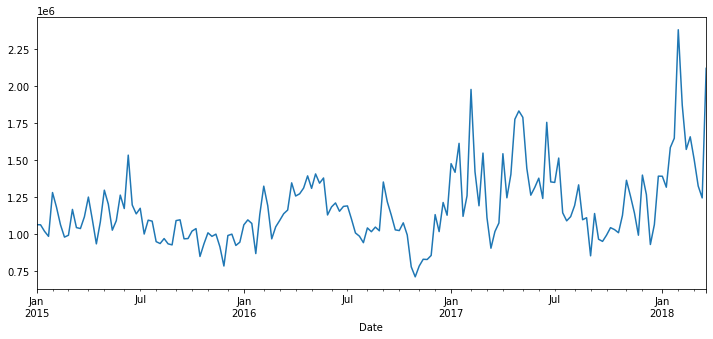

In [105]:
data['Total Volume'].plot(figsize=(12,5))

In [107]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
adf_test(data['Total Volume'])

1. ADF :  -2.9278723763139407
2. P-Value :  0.04220150087606746
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 166
5. Critical Values :
	 1% :  -3.4703698981001665
	 5% :  -2.8791138497902193
	 10% :  -2.576139407751488


<H2> P-Value :  0.04220150087606746, so it can be considered a stationary set </h2>

In [108]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

<h2> To determine optimal p,d,q values

In [109]:
stepwise_fit=auto_arima(data['Total Volume'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4575.041, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4593.115, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4585.960, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4577.001, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4591.274, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4573.347, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4571.516, Time=0.04 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4573.546, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4574.204, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4574.994, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4570.228, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4575.463, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4572.097, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4572.120, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  169
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -2282.114
Date:                Tue, 05 Oct 2021   AIC                           4570.228
Time:                        11:17:55   BIC                           4579.600
Sample:                             0   HQIC                          4574.031
                                - 169                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3392      0.069     -4.929      0.000      -0.474      -0.204
ma.L2         -0.2316      0.070     -3.301      0.001      -0.369      -0.094
sigma2      3.774e+10   1.67e-13   2.26e+23      0.000    3.77e+10    3.77e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               104.51
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               3.91   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.05e+40. Standard errors may be unstable.
"""

<h2> Fitting ARIMA model for dataset </h2>

In [127]:
from statsmodels.tsa.arima.model import ARIMA

In [128]:
data.shape

(169, 6)

In [129]:
20/100*(data.shape[0])

33.800000000000004

In [130]:
train=data.iloc[0:-33] 
test=data.iloc[-33:]
train.shape, test.shape

((136, 6), (33, 6))

In [131]:
forecast_model=ARIMA(train['Total Volume'],order=(0,1,2))
forecast_model=forecast_model.fit()
forecast_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Total Volume   No. Observations:                  136
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1818.242
Date:                Tue, 05 Oct 2021   AIC                           3642.484
Time:                        11:32:41   BIC                           3651.200
Sample:                    01-04-2015   HQIC                          3646.026
                         - 08-06-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3156      0.064     -4.906      0.000      -0.442      -0.190
ma.L2         -0.2087      0.067     -3.114      0.002      -0.340      -0.077
sigma2      2.962e+10    2.8e-13   1.06e+23      0.000    2.96e+10    2.96e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                23.43
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               3.49   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.56e+38. Standard errors may be unstable.
"""